# Лагов Сергей ИУ8-82 ОиРС Инсульт

In [303]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


bmi — body mass index
stroke — целевой признак
hypertension // Гипертония (высокое артериальное давление) – состояние, при котором давление в кровеносных сосудах превышает нормальные показатели (140/90 мм рт. ст. или выше)

In [305]:
df = df.drop('id', axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [306]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [307]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [308]:
df['bmi'].isnull().sum()

201

In [309]:
df['bmi'].fillna(df['bmi'].mean())

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [310]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [311]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [312]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [313]:
df = df.drop(df[df.gender == 'Other'].index)
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [314]:
df.describe().T # stroke (инсульт) — целевой признак

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In [315]:
df['smoking_status'].value_counts() # ~ 33% Unknown удаляем столбец

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [316]:
df = df.drop('smoking_status', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


In [317]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [318]:
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

In [319]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [320]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [321]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [322]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [323]:
df = df.drop('work_type', axis=1)
df = df.drop('ever_married', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   Residence_type     5109 non-null   object 
 5   avg_glucose_level  5109 non-null   float64
 6   bmi                4908 non-null   float64
 7   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 359.2+ KB


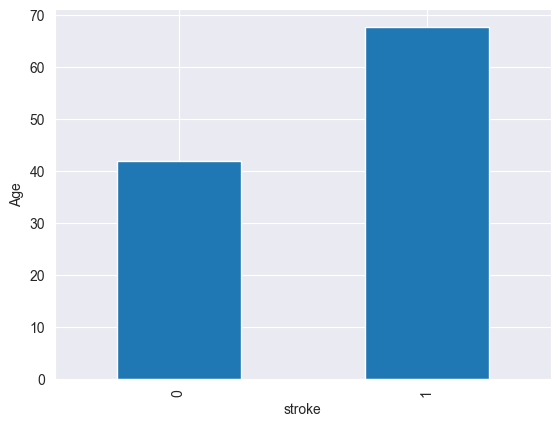

In [324]:
# График с подписью

df.groupby('stroke')['age'].mean().plot(kind='bar')
plt.ylabel('Age')
plt.show(); # Средний возраст с инсультом и без

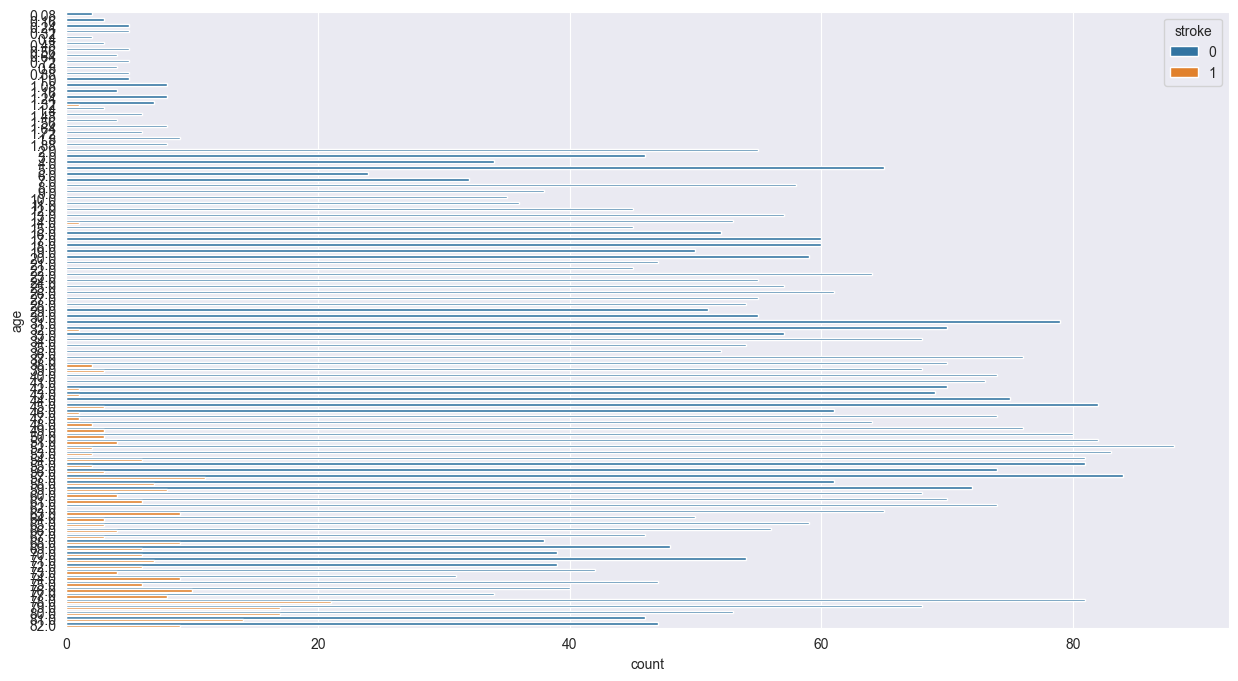

In [325]:
plt.figure(figsize=(15, 8))
sns.countplot(y='age', hue='stroke', data=df);

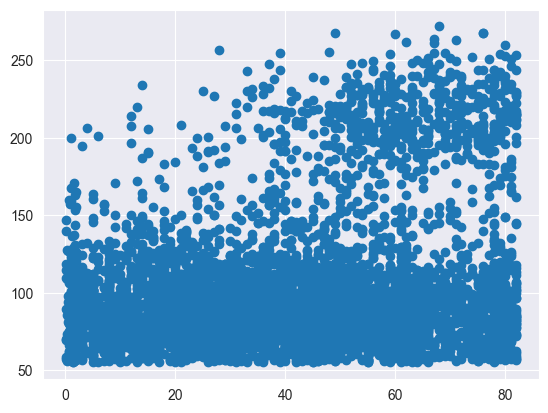

In [326]:
plt.scatter(df['age'], df['avg_glucose_level']);

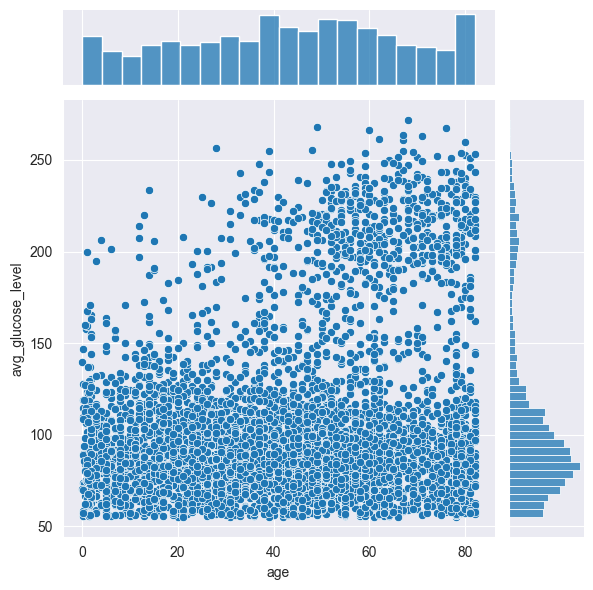

In [327]:
sns.jointplot(x='age', y='avg_glucose_level', data=df);

In [328]:
df.pivot_table(values=['age', 'bmi', 'avg_glucose_level'], index=['gender', 'stroke'], aggfunc='mean')

age  avg_glucose_level        bmi
gender stroke                                         
Female 0       42.601935         103.051753  29.015952
       1       67.137021         124.414397  30.218333
Male   0       41.083388         107.255112  28.547711
       1       68.500000         143.159352  30.812360

In [329]:
pd.crosstab(df['hypertension'], df['stroke'])

stroke,0,1
hypertension,,
0,4428,183
1,432,66


In [330]:
pd.crosstab(df['gender'], df['hypertension'])

hypertension,0,1
gender,,
Female,2718,276
Male,1893,222


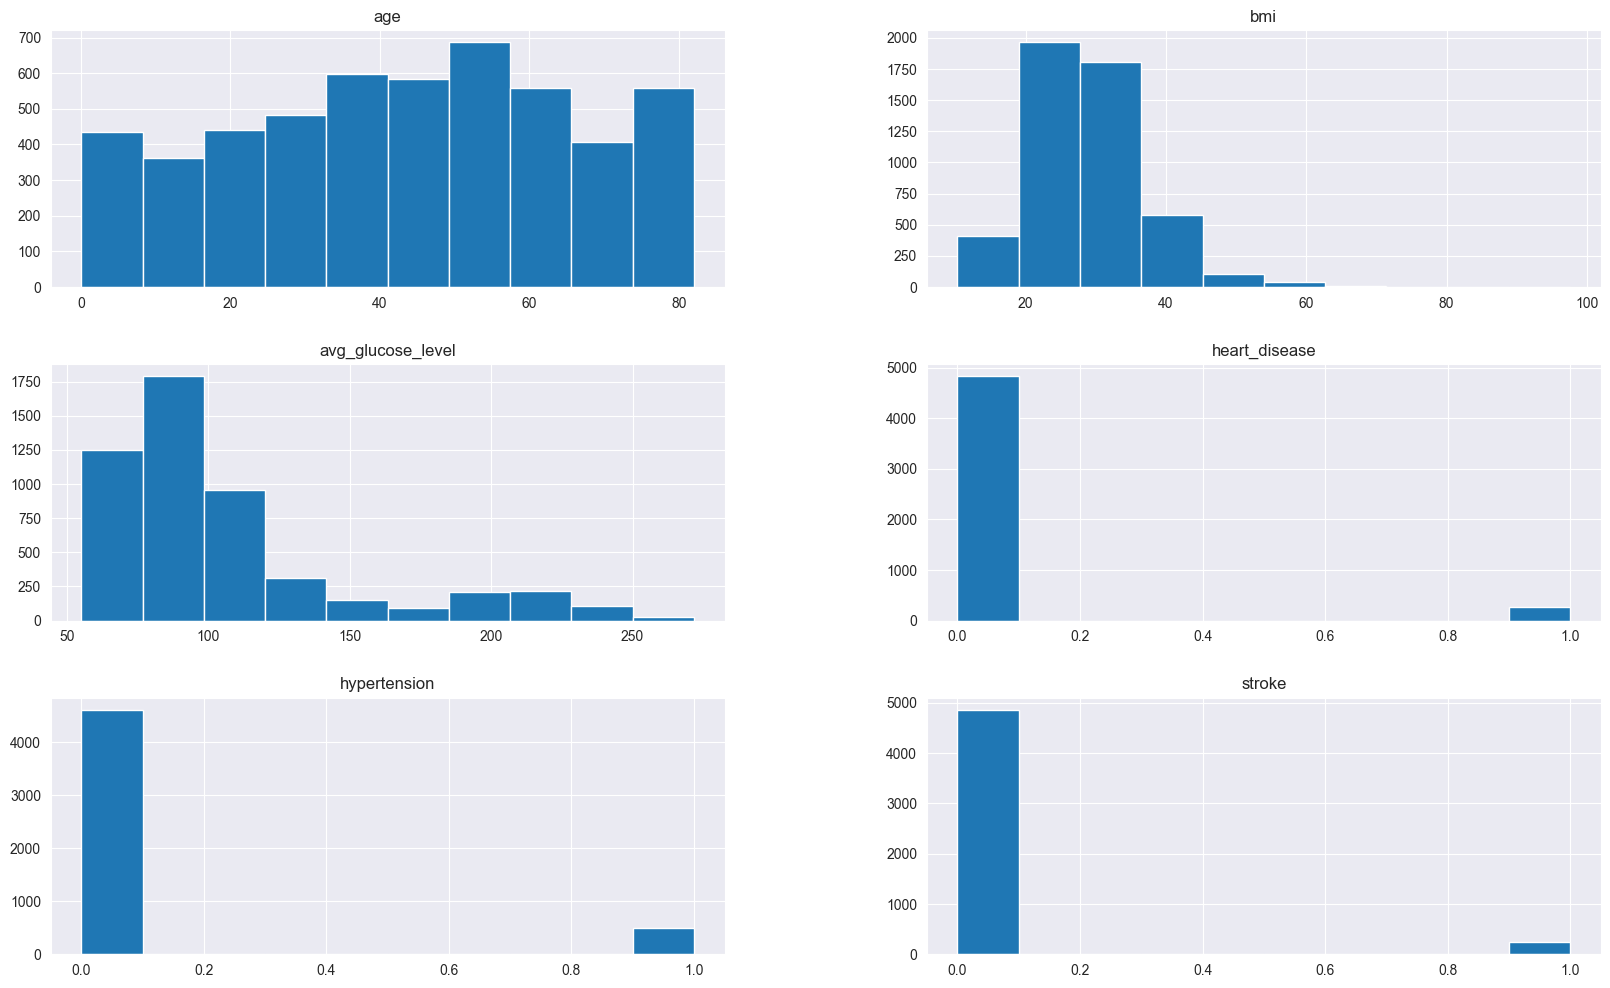

In [331]:
numeric = ['age', 'bmi', 'avg_glucose_level', 'heart_disease', 'hypertension']
df[numeric + ['stroke']].hist(figsize=(20,12));

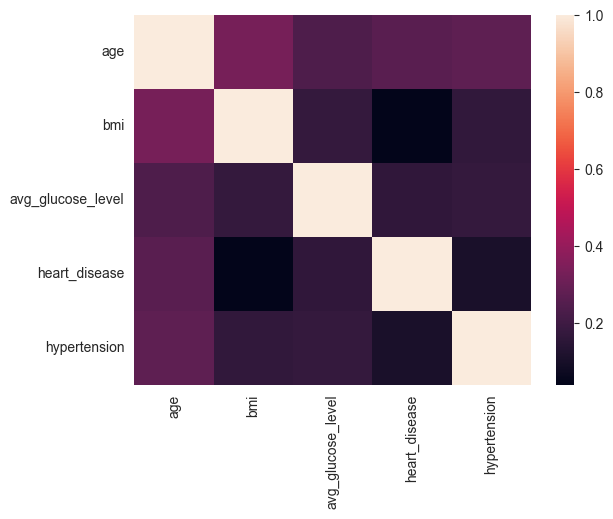

In [332]:
# от -1 до 1 . чем больше по модулю тем сильнее корреляция, знак определяет сонаправленность изменений
sns.heatmap(df[numeric].corr());
# сильно коррелируют bmi и age, hypertension и age

# меньше всего bmi и heart_disease

/var/folders/h_/3n5xb4h525d1g0q9zj09d5gm0000gn/T/ipykernel_53536/1665804931.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aggfunc='mean').fillna(0).applymap(float)


<Axes: xlabel='Residence_type', ylabel='gender'>

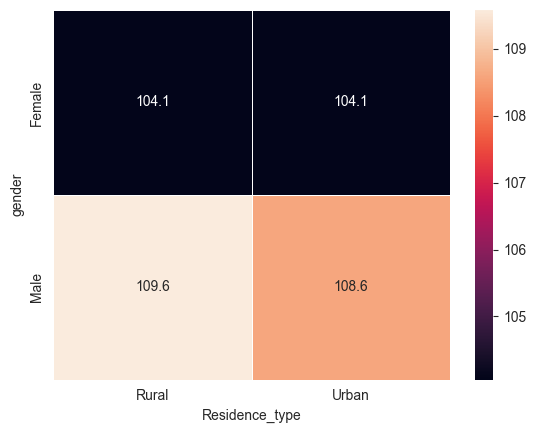

In [333]:
creditcard_salary = df.pivot_table(
                        index='gender',
                        columns='Residence_type',
                        values='avg_glucose_level',
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(creditcard_salary, annot=True, fmt=".1f", linewidths=.5)
# у женщин малоинформативно
# у мужчин действительно в городской среде глюкоза в деревне выше чем в городе — странно

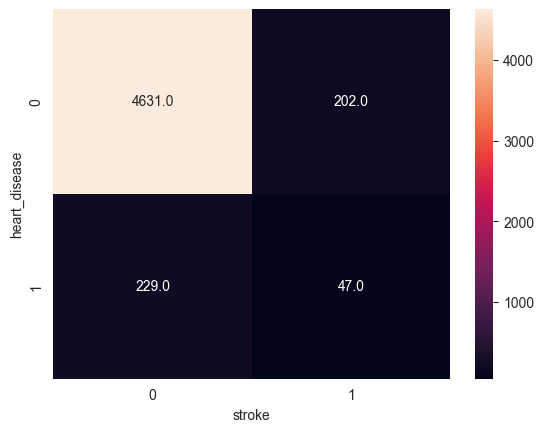

In [334]:
sns.heatmap(pd.crosstab(df['heart_disease'], df['stroke']), annot=True, fmt=".1f");

Какие выводы?
1. Чем страше, тем больше человек с инсультом
2. Чем старше, тем больше глюкоза в среднем
3. Процент гипертонии у мужчин выше
4. Чем выше age, тем выше bmi
5. Чем выше тем выше age, hypertension
6. bmi почти никак не влияет на heart_disease
7. Уровень глюкозы мало зависит от среды проживания
8. У людей без болезней сердца шанс поймать инсульт намного ниже